# Lab 4B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Setting the Aesthetics for the plots (2 marks)

### 1.1: Set the Seaborn figure theme and scale up the text in the figures (2 marks)

There are five preset Seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. 
They are each suited to different applications and personal preferences.
You can see what they look like [here](https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles).

Hint: You will need to use the `font_scale` property of the `set_theme()` function in Seaborn.

In [2]:
# Your Solution Here
sns.set_theme(style="dark",
              font_scale=1.3)

## Task 2: Exploratory Data Analysis (40 marks)

### 2.1. Describe your dataset (2 marks)

Consider the following questions to guide you in your exploration:

- Who: Which company/agency/organization provided this data?
- What: What is in your data?
- When: When was your data collected (for example, for which years)?
- Why: What is the purpose of your dataset? Is it for transparency/accountability, public interest, fun, learning, etc...
- How: How was your data collected? Was it a human collecting the data? Historical records digitized? Server logs?

**Hint: The [pokemon dataset is from this Kaggle page.](https://www.kaggle.com/rounakbanik/pokemon)**

*Hint: You probably will not need more than 250 words to describe your dataset. All the questions above do not need to be answered, it's more to guide your exploration and think a little bit about the context of your data. It is also possible you will not know the answers to some of the questions above, that is FINE - data scientists are often faced with the challenge of analyzing data from unknown sources. Do your best, acknowledge the limitations of your data as well as your understanding of it. Also, make it clear what you're speculating about. For example, "I speculate that the {...column_name...} column must be related to {....} because {....}."*

### 2.2. Load the dataset from a file, or URL (1 mark)

This needs to be a pandas dataframe. Remember that others may be running your jupyter notebook so it's important that the data is accessible to them. If your dataset isn't accessible as a URL, make sure to commit it into your repo. If your dataset is too large to commit (>100 MB), and it's not possible to get a URL to it, you should contact your instructor for advice.

You can use this URL to load the data: https://github.com/firasm/bits/raw/master/pokemon.csv

In [3]:
# Your solution here
df = pd.read_csv('https://github.com/firasm/bits/raw/master/pokemon.csv')

### 2.3. Explore your dataset (3 marks)

Which of your columns are interesting/relevant? Remember to take some notes on your observations, you'll need them for the next EDA step (initial thoughts).

#### 2.3.1:  You should start with [`df.describe().T`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) (2 marks)

See [linked documentation]((https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for the use of `include`/`exclude` to look at numerical and categorical data.

In [4]:
# Your solution to output `df.describe.T` for numerical columns:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


In [5]:
# Your solution to output `df.describe.T` for categorical columns:
df.describe(exclude=np.number).T

,count,unique,top,freq
Name,800,800,Beedrill,1
Type 1,800,18,Water,112
Type 2,414,18,Flying,97
Legendary,800,2,False,735


#### 2.3.2 Let's try `pandas_profiling` now. (1 mark)

**Hint: To install the [`pandas_profiling`](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3) package, you'll need to use `conda`:**

- `conda install -c conda-forge pandas-profiling`

In [36]:
import pandas_profiling
# Your solution for `pandas_profiling`
pandas_profiling.ProfileReport(df)

ModuleNotFoundError: No module named 'ipywidgets'

### 2.4. Initial Thoughts (2 marks)

#### 2.4.1. Use this section to record your observations. (2 marks)

Does anything jump out at you as surprising or particularly interesting? 

Where do you think you'll go with exploring this dataset? Feel free to take notes in this section and use it as a scratch pad.

Any content in this area will only be marked for effort and completeness.

#### # Your observations here:

- Obs 1
- Obs 2
- ...

### 2.5. Wrangling (5 marks)

The next step is to wrangle your data based on your initial explorations. Normally, by this point, you have some idea of what your research question will be, and that will help you narrow and focus your dataset. 

In this lab, we will guide you through some wrangling tasks with this dataset.

#### 2.5.1. Drop the 'Generation', 'Sp. Atk', 'Sp. Def', 'Total', and the '#' columns (1 mark)

In [7]:
# Your solution here
df1 = df.drop(['Sp. Atk', 'Sp. Def', 'Total', '#'], axis=1)
df1

,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,60,1,False
2,Venusaur,Grass,Poison,80,82,83,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,1,False
4,Charmander,Fire,NaN,39,52,43,65,1,False
...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,50,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60,80,6,True


#### 2.5.2. Drop any NaN values in HP, Attack, Defense, Speed (1 mark)

In [8]:
# Your solution here
df2 = df.dropna(subset=['HP','Attack','Defense','Speed'])
df2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


#### 2.5.3. Reset the index to get a new index without missing values (1 mark)

In [12]:
# Your solution here
df3 = df.reset_index()
df3

,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


#### 2.5.4. A new column was added called `index`; remove it. (1 mark)

In [13]:
# Your solution here
df4 = df3.drop(['index'], axis=1)
df4

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


#### 2.5.5. Calculate a new column called "Weighted Score" that computes an aggregate score comprising:

- 20% 'HP'
- 40% 'Attack'
- 30% 'Defense'
- 10% 'Speed'

**(1 mark)**

In [19]:
# Your solution here
df['Weighted_Score'] = df['HP']*0.2 +\
                       df['Attack']*0.4 +\
                       df['Defense']*0.3 +\
                       df['Speed']*0.1

df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Weighted_Score
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,47.8
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,61.7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,81.7
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,100.9
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,100.0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,118.0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,85.0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,106.0


### 2.6. Research questions (2 marks)

#### 2.6.1 Come up with at least two research questions about your dataset that will require data visualizations to help answer. (2 marks)

Recall that for this purpose, you should only aim for "Descriptive" or "Exploratory" research questions.

**Hint1: You are welcome to calculate any columns that you think might be useful to answer the question (or re-add dropped columns like 'Generation', 'Sp. Atk', 'Sp. Def'.***

**Hint2: Try not to overthink this; this is a toy dataset about Pokémon, you're not going to solve climate change or cure world hunger. Focus your research questions on the various Pokémon attributes, and the types.**

#### # Your solution here: 

**1. Sample Research Question:** Which Pokemon Types are the best, as determined by the Weighted Score?

**2. Your RQ 1:**

**3. Your RQ 2:**



### 2.7. Data Analysis and Visualizations

#### 2.7.1. **Sample Research Question:** Which Pokemon Types are the best, as determined by the Weighted Score? (3 marks)

To answer this question, we will first need to do wrangle the data to return the mean Weighted_Score, split by the Pokemon Type 1. 

Here is the goal of this analysis:

<img src="groupby.png" width="200px">


In [26]:
# Your Solution here
df_1 = (df.groupby('Type 1')['Weighted_Score'].mean().sort_values(ascending=False).to_frame().reset_index())

df_1

,Type 1,Weighted_Score
0,Dragon,95.728125
1,Steel,93.562963
2,Rock,86.047727
3,Ground,84.900000
4,Fighting,79.066667
5,Dark,77.400000
6,Flying,75.775000
7,Fire,75.663462
8,Ghost,73.190625
9,Water,72.553571


#### 2.7.2. Create a violin plot to show the distribution of Weighted_Scores split by all the Pokémon types. (2 marks)

Here is the goal:

<img src="violin.png" width="350px">

In [12]:
# Your Solution here

#### 2.7.3. Create a Box Plot and overlay a strip plot (2 marks)

Here is the goal:

<img src="BoxPlot.png" width="350px">

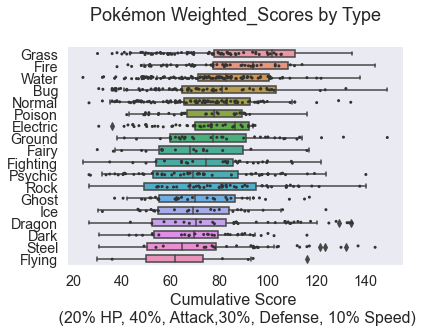

In [29]:
# Your Solution here 

sns.boxplot(data=df,
           x='Weighted_Score',
           y='Type 1',
           order = df_1['Type 1'].tolist(),
           width=0.6)

sns.stripplot(x="Weighted_Score", y="Type 1", data=df,
              size=3, color=".2", linewidth=0)
plt.ylabel('')
plt.title('Pokémon Weighted_Scores by Type\n',fontsize=18)
plt.xlabel('Cumulative Score \n (20% HP, 40%, Attack,30%, Defense, 10% Speed)',fontsize=16)
sns.despine(left=True)

#### 2.7.4. Create a [Hexbin plot with marginal distributions](http://seaborn.pydata.org/generated/seaborn.jointplot.html) (2 marks)

This plot helps you visualize large amounts of data (and its distributions) by using colours to represent the number of points in a hexagonal shape.

Here is the goal:

<img src="jointplot.png" width="350px">

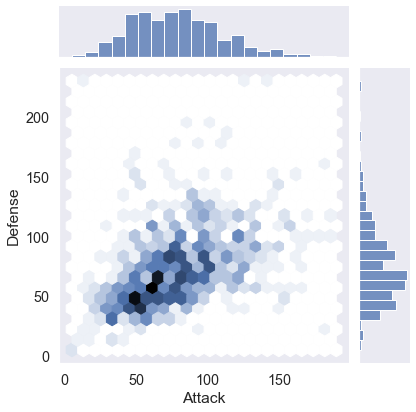

In [8]:
# Your Solution here 
sns.jointplot(data=df, x='Attack', y='Defense', kind='hex')

#### 2.7.5. Create a [PairPlot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) of the quantiative features of the pokémon dataset (1 mark)

Here is the goal:

<img src="pairplot.png" width="350px">

Text(0.5, 0.98, 'Relationships of Pokémon Skill Attribute')

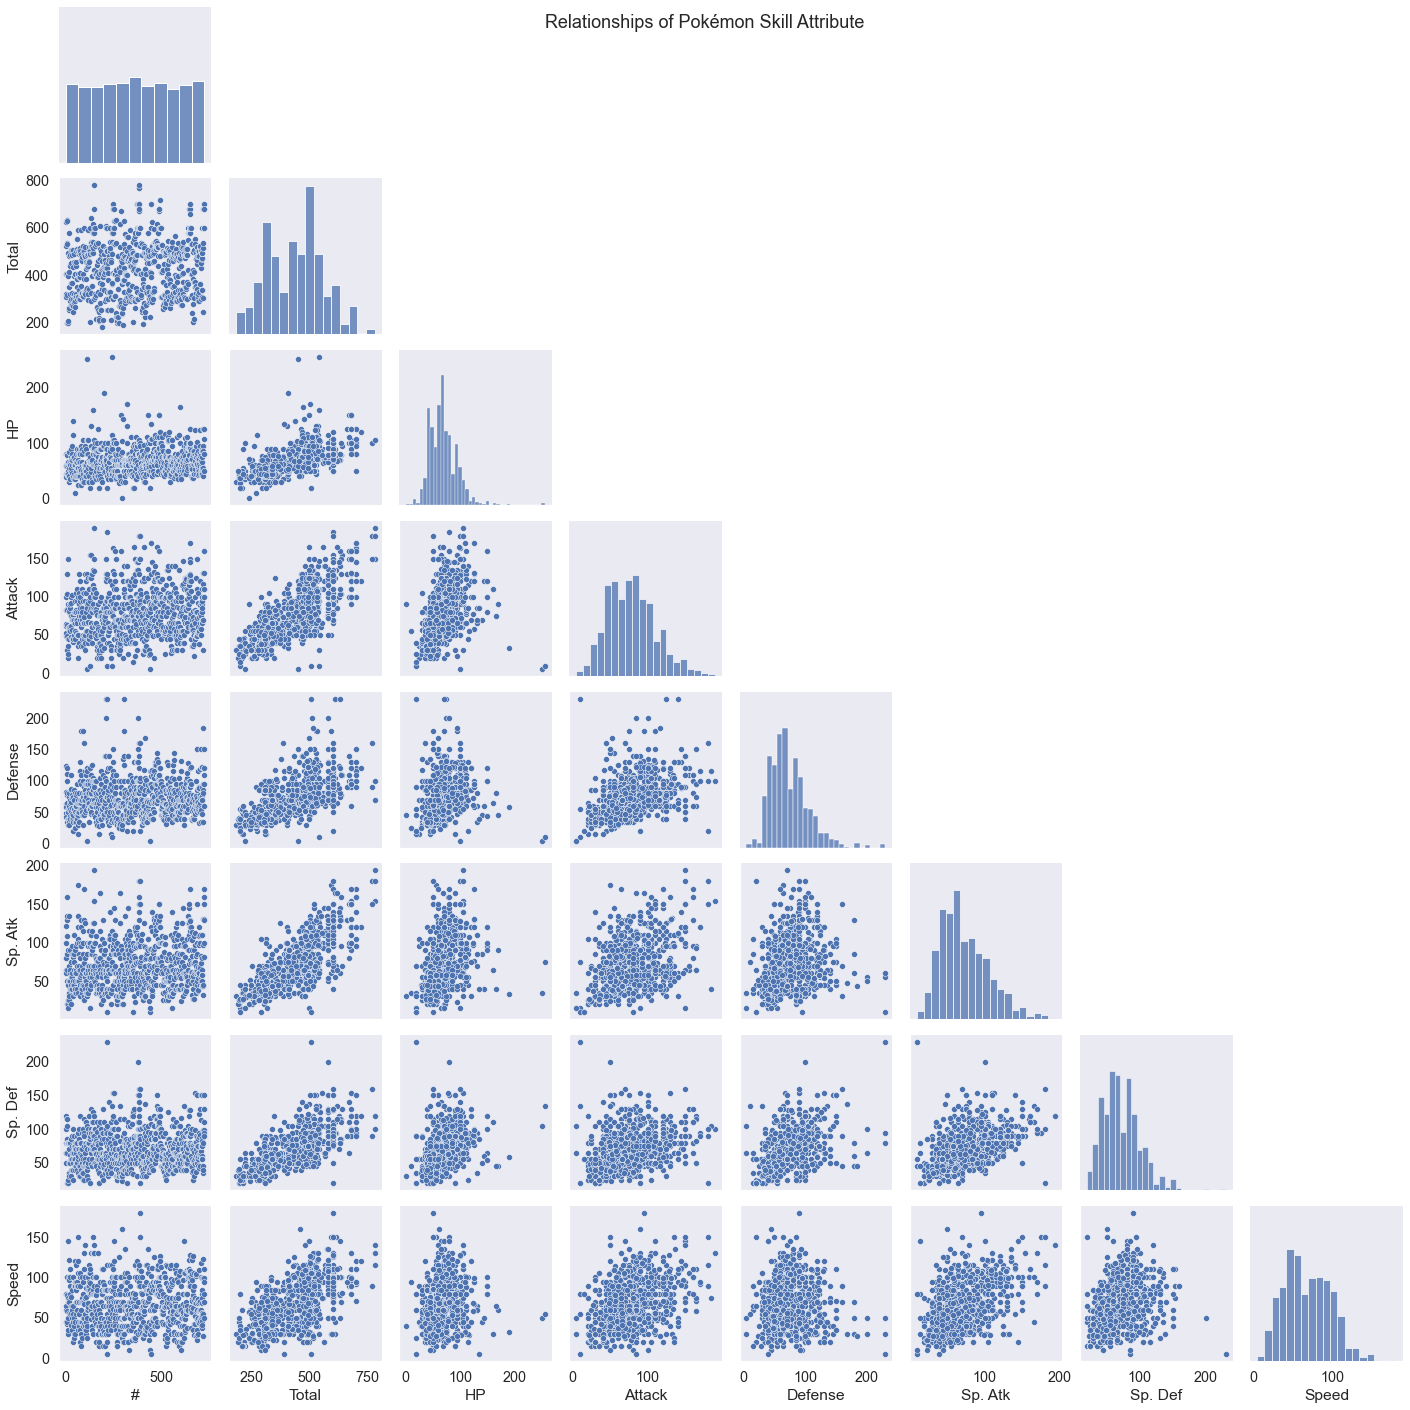

In [7]:
# Your Solution here
Task2_7 = sns.pairplot(data=df.select_dtypes(include='number').drop('Generation',axis=1),
                 corner=True)

Task2_7.fig.suptitle('Relationships of Pokémon Skill Attribute',fontsize=18)


#### 2.7.6. Create a visualization that helps you answer your first research question (2 marks)

In [17]:
# Your Solution here


#### 2.7.7. Create a visualization that helps you answer your second research question (2 marks)

In [18]:
# Your Solution here

### 2.8. Summary and conclusions (3 marks)

#### 2.8.1. Summarize your findings and describe any conclusions and insight you were able to draw from your visualizations. (3 marks)

- **Sample Research Question:** Which Pokemon Types are the best, as determined by the Weighted Score? (3 marks)

    - Summary of findings, insight, and conclusions
    - ..
    

- **Research Question 1:** RQ here

    - Summary of findings, insight, and conclusions
    - ..
    

- **Research Question 2:** RQ here

    - Summary of findings, insight, and conclusions
    - ..

## Task 3. Method Chaining (8 marks)

Method chaining allows you to apply multiple processing steps to your dataframe in a fewer lines of code so it is more readable. You should avoid having too many methods in your chain, as the more you have in a single chain, the harder it is to debug or troubleshoot. I would target about 5 methods in a chain, though this is a flexible suggestion and you should do what makes your analysis the most readable and group your chains based on their purpose (e.g., loading/cleaning, processing, etc…).

**Note: See Milestone 2 for a more thorough description of method chaining.**

#### 3.1. Use Method Chaining on the commands from sections B5.1, B5.2, B5.3, B5.4, B5.5. (4 marks)

In [31]:
# Your Solution here
mc = (
    pd.read_csv('https://github.com/firasm/bits/raw/master/pokemon.csv')
    .drop(['Sp. Atk', 'Sp. Def', 'Total', '#'], axis=1)
    .dropna(subset=['HP','Attack','Defense','Speed'])
    .reset_index() 
    .drop(['index','Type 2'], axis=1) 
    .assign(Weighted_Score = df['HP']*0.2 +\
                               df['Attack']*0.4 +\
                               df['Defense']*0.3 +\
                               df['Speed']*0.1)
)
mc

,Name,Type 1,HP,Attack,Defense,Speed,Generation,Legendary,Weighted_Score
0,Bulbasaur,Grass,45,49,49,45,1,False,47.8
1,Ivysaur,Grass,60,62,63,60,1,False,61.7
2,Venusaur,Grass,80,82,83,80,1,False,81.7
3,VenusaurMega Venusaur,Grass,80,100,123,80,1,False,100.9
4,Charmander,Fire,39,52,43,65,1,False,48.0
...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,50,100,150,50,6,True,100.0
796,DiancieMega Diancie,Rock,50,160,110,110,6,True,118.0
797,HoopaHoopa Confined,Psychic,80,110,60,70,6,True,85.0
798,HoopaHoopa Unbound,Psychic,80,160,60,80,6,True,106.0


#### 3.2. Use Method Chaining to do the tasks below. (4 marks)

1. Remove all Pokémon 6th generation and above.
2. Remove the Legendary column.
3. Remove all rows that contain "Forme", a special form of Pokémon.
4. Remove all rows that contain "Mega", another weird special form of Pokémon.

**Hint: You will need to use the [.loc](https://towardsdatascience.com/effective-data-filtering-in-pandas-using-loc-40eb815455b6) in combination with the anonymous function lambda.**

In [32]:
# Your Solution here
mc_2 = (df.loc[lambda x: x['Generation']<6].loc[lambda x: ~x['Legendary']].loc[lambda x: ~x['Name'].str.contains('Forme')]
    .loc[lambda x: ~x['Name'].str.contains('Mega')])
mc_2

,Name,Type 1,HP,Attack,Defense,Speed,Generation,Legendary,Weighted_Score
0,Bulbasaur,Grass,45,49,49,45,1,False,47.8
1,Ivysaur,Grass,60,62,63,60,1,False,61.7
2,Venusaur,Grass,80,82,83,80,1,False,81.7
4,Charmander,Fire,39,52,43,65,1,False,48.0
5,Charmeleon,Fire,58,64,58,80,1,False,62.6
...,...,...,...,...,...,...,...,...,...
695,Zweilous,Dark,72,85,70,58,5,False,75.2
696,Hydreigon,Dark,92,105,90,98,5,False,97.2
697,Larvesta,Bug,55,85,55,60,5,False,67.5
698,Volcarona,Bug,85,60,65,100,5,False,70.5


## Task 4. (OPTIONAL) Advanced Visualizations 

### 4.1. Create a ["Ridgeline"](https://seaborn.pydata.org/examples/kde_ridgeplot.html) plot fron the plots from B7.2 and B7.3 (2 marks).

Here is the goal:

<img src="ridgeline.png" width="300px">

In [19]:
# Your Solution Here